In [1]:
# import
import tensorflow as tf

print(tf.__version__)

2.15.0


In [2]:
! pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.8 MB/s eta 0:00:00


In [3]:
# import
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [4]:
# get data
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

#rescale
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

# args
BUFFER_SIZE = 60000
BATCH_SIZE = 32

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

11490434/11490434 [==============================] - 1s 0us/step


Go to this `.py` script [here](https://github.com/yiqiao-yin/WYNAssociates/blob/main/src/cv_solution/vapad.py) and save it locally as a file called `utils.py` in the same directory of this notebook.

In [5]:
from vapad import *

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


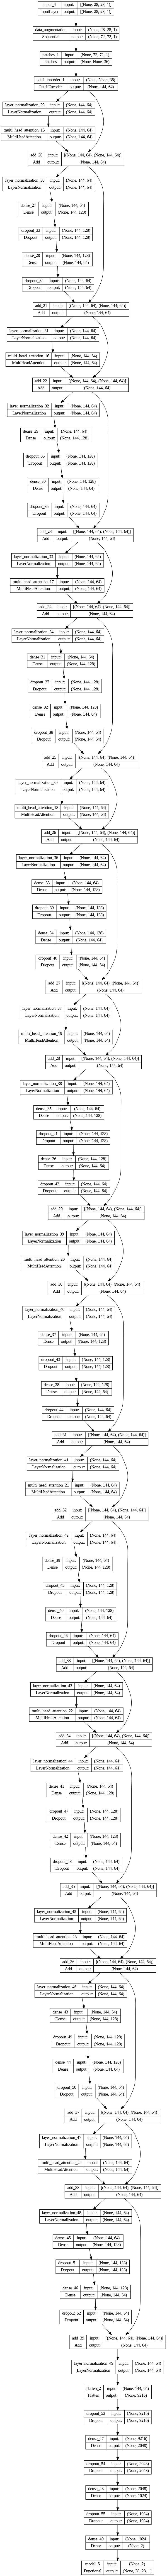

In [6]:
# Example usage:
vapad_model = VapadModel(input_shape=(28, 28, 1), batch_size=BATCH_SIZE)
tf.keras.utils.plot_model(vapad_model.build_vapad_model(), show_shapes=True)

(1, 28, 28, 1)
(1, 28, 28, 1)


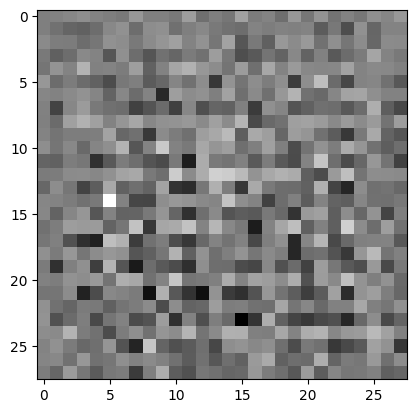

In [7]:
noise = tf.random.normal([1, 28, 28, 1])
print(noise.shape)
generated_image = generator(noise)
print(generated_image.shape)

# plot an output from generator that is untrained
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [8]:
# define discriminator
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[1.4857551]], shape=(1, 1), dtype=float32)


In [9]:
from tqdm import tqdm

In [10]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
BATCH_SIZE

32

In [12]:
25088/784


32.0

In [ ]:
%%time

# train
with tf.device('/device:GPU:0'):
    train(train_dataset, 5)

100%|██████████| 1875/1875 [03:03<00:00, 10.24it/s]


Time for epoch 1 is 183.142187833786 sec
...
...
...
...


100%|██████████| 1875/1875 [02:11<00:00, 14.30it/s]


Time for epoch 2 is 131.115647315979 sec
...
...
...
...


100%|██████████| 1875/1875 [02:16<00:00, 13.78it/s]


Time for epoch 3 is 136.03387260437012 sec
...
...
...
...


100%|██████████| 1875/1875 [02:09<00:00, 14.44it/s]


Time for epoch 4 is 129.84156250953674 sec
...
...
...
...


 85%|████████▍ | 1592/1875 [01:53<00:39,  7.11it/s]

In [ ]:
%%time

for k in range(200):

    # train
    with tf.device('/device:GPU:0'):
        train(train_dataset, 6)

    # Assuming 'train_images' and 'train_labels' are defined and 'generator' is your model
    plt.figure(figsize=(20, 4))  # Adjusted size for better visibility
    T = 20

    # Display real images
    for i in range(T):
        plt.subplot(3, T, i + 1)
        plt.imshow(train_images[i], cmap='gray')
        plt.title(f"Real: {train_labels[i]}")
        plt.axis('off')

    # Display fake images generated by the model
    for i in range(T):
        masked_output_, output_ = make_inference(train_images[i], generator)
        masked_output_ = tf.reshape(masked_output_, [28, 28])
        plt.subplot(3, T, i + T + 1)  # +7 to move to the second row, right below the corresponding real image
        plt.imshow(masked_output_, cmap='gray')  # Adjust indexing if needed
        plt.title(f"Masked: {train_labels[i]}")
        plt.axis('off')

    # Display fake images generated by the model
    for i in range(T):
        masked_output_, output_ = make_inference(train_images[i], generator)
        plt.subplot(3, T, i + T + T + 1)  # +7 to move to the second row, right below the corresponding real image
        plt.imshow(output_[0, :, :, 0], cmap='gray')  # Adjust indexing if needed
        plt.title(f"Gen.: {train_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Chk point
    print("===============================!")
    print(f"Checkpoint {k+1}")
